In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

- scoreメソッドはクラス分類に関しては正しくクラス分類されたサンプルの割合を計算する

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#合成データセットの生成
X, y = make_blobs(random_state=0)
# dataトラベルを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#モデルのインスタンスを生成し、訓練データで学習
logreg = LogisticRegression().fit(X_train, y_train)
#テストセットを評価
print("test set score: {:.2f}".format(logreg.score(X_test, y_test)))

test set score: 0.88


## 交差検証(cross-validation)

- 汎化性能を評価する統計的手法
- データの分割を何度も繰り返し行い、複数のモデルを訓練する
- 最もよく用いられる交差検証手法は、k分割交差検証(k-fold cross-validation)

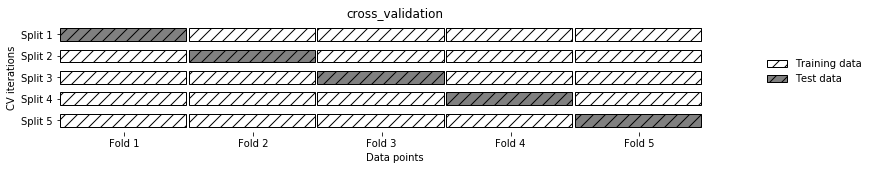

In [3]:
mglearn.plots.plot_cross_validation()

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


- cross_val_scoreはデフォルトでは3分割交差検証を行う
- パラメータcvで分割数を変更することができる

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


- 交差検証の精度をまとめるには、一般に平均値を用いる

In [6]:
print("Average cross-validation scores: {:.2f}".format(scores.mean()))

Average cross-validation scores: 0.96


### 交差検証の利点と欠点

- train_test_splitでは、ランダムにデータを分割するので、「偶然にも」訓練データに判別の難しいデータばかりが集まり、テストデータに判別が簡単なデータばかりが集まることもありうる
- そうした偶然による結果のブレを抑えることができる
- データを多数に分解することで、モデルの訓練データセットに対する敏感さを知ることができる（モデルの最悪の場合と最高の場合がわかる）
- データをより効率的に使うことができる
- 交差検証の最大の問題点は計算コスト

### 層化k分割交差検証と他の戦略

- データセットをk個に分割するやり方は常にうまくいくとは限らない

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels: \n{}".format(iris.target))

Iris labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- これを交差検証にかけても、うまくいくはずがない
- scikit-learnでは、クラス分類器に関しては単純なk分割交差検証を用いず、層化k分割交差検証を用いる

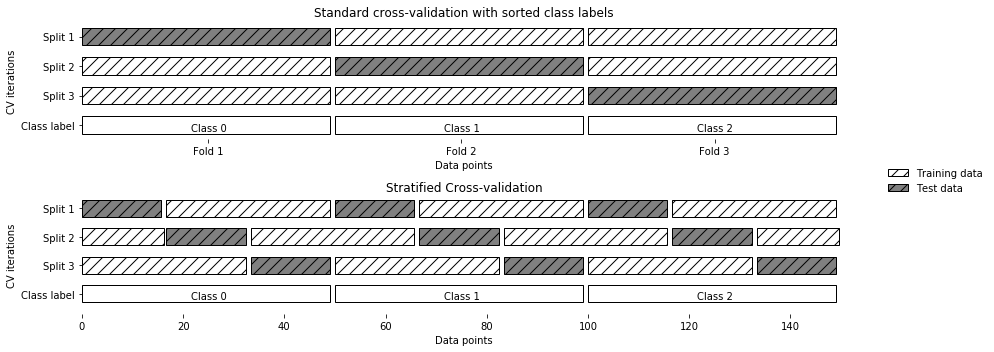

In [8]:
mglearn.plots.plot_stratified_cross_validation()

### 交差検証分割器（cross-valudation splitter）

- cvパラメータに交差検証分割器を与えることで、より詳細な制御が可能

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [11]:
kfold=KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


In [12]:
# データをシャッフルする設定
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


### 一つ抜き交差検証（Leave One Out）

- k分割交差検証の個々の分割が1サンプルしかない
- 毎回1サンプルだけをテストセットとして設定する
- 大規模データには時間がかかる

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


### シャッフル分割交差検証(shuffle-split cross-validation)

- 毎回train_size個の点を選び出して訓練セットとする
- test_size個の（訓練セットと重複しない）点選び出してテストセットとする
- これをn_iter個繰り返す

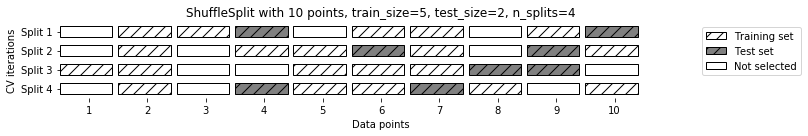

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split =ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n {}".format(scores))

Cross-validation scores:
 [ 0.97333333  0.97333333  0.90666667  0.76        0.96        0.90666667
  0.93333333  0.94666667  0.94666667  0.96      ]


### グループ付き交差検証

- データセットの中に密接に関係するグループがある場合に用いられる交差検証の設定
- 引数としてgroups配列をとり、訓練セットとテストセットに分離する際に分割してはならないグループを示す

In [18]:
from sklearn.model_selection import GroupKFold
#合成データセットを生成
X, y = make_blobs(n_samples=12, random_state=0)
# 最初の3サンプルが同じグループに、次の4つが同じグループに
groups = [0, 0, 0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


## グリッドサーチ

- パラメータをチューニングしてモデルの汎化性能を向上させる方法の一つ

In [21]:
#ナイーブなグリッドサーチの実装
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training dataset: {} Size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #SVCテストセットで評価
        score = svm.score(X_test, y_test)
        #良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training dataset: 112 Size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


- 様々なパラメータを試して、最適な値を見つけたが、必ずしも新しいデータにも当てはまるわけではない
- テストデータもチューニングに使ってしまったので、テストデータをモデルの精度を評価するのには使えない
- これを回避するため、データを３つに分割する方法がある

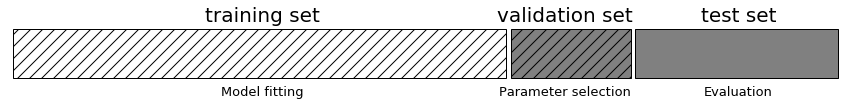

In [22]:
mglearn.plots.plot_threefold_split()

In [25]:
from sklearn.svm import SVC
#データを訓練＋検証セットとテストセットに分割する
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
#訓練＋検証セットを訓練セットと検証セットに分割する
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {}  Size of validation set: {}   size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0], X))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #SVCテストセットで評価
        score = svm.score(X_valid, y_valid)
        #良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# 訓練セットと検証セットを用いて構築したモデルをテストセットで評価
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validationset: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84  Size of validation set: 28   size of test set: 38

Best score on validationset: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 交差検証を用いたグリッドサーチ

- データの分割のされ方によって、性能が大きく変動しうる
- 汎化性能をより良く見積もるためには、それぞれのパラメータの組み合わせに対して、交差検証を行えば良い

In [30]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        # 交差検証を行う
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        #交差検証精度の平均値を計算する
        score = np.mean(scores)
        svm.fit(X_train, y_train)
        #良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# 訓練セットと検証セットを合わせてモデルを再構築する
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

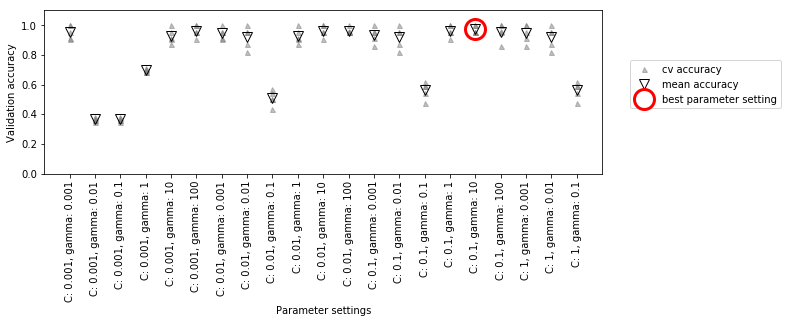

In [31]:
mglearn.plots.plot_cross_val_selection()

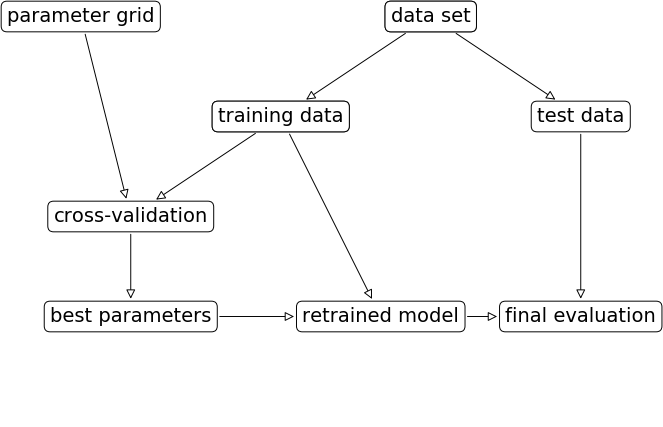

In [32]:
# データを分割し、グリッドサーチを行い、最後のパラメータを評価する過程
mglearn.plots.plot_grid_search_overview()

- 交差検証を用いたグリッドサーチは、非常に一般的にパラメータチューニングに使われるので、scikit-learnにクラスが用意されている（GridSearchCVクラス）

In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [39]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
